In [1]:
import h5py
f = h5py.File("/home/memmelma/Projects/robotic/gifs_curobo/red_cube_1000_low_rand.hdf5", "r", swmr=True)

In [2]:
f["data"]["demo_0"]["obs"]["camera_intrinsic"].shape, f["data"]["demo_0"]["raw_actions"].shape, f["data"]["demo_0"]["obs"]["depth"].shape

((62, 3, 3), (62, 8), (62, 256, 256))

In [3]:
f["data"]["demo_0"].attrs["num_samples"]

array([[[ 5.26053413e-01,  3.81346155e-03,  2.28350548e-01,
          9.99973755e-01, -4.42339549e-05,  5.01985079e-04,
         -7.22733747e-03]],

       [[ 5.26053413e-01,  3.81346155e-03,  2.28350548e-01,
          9.99973755e-01, -4.42339549e-05,  5.01985079e-04,
         -7.22733747e-03]],

       [[ 5.26053413e-01,  3.81346155e-03,  2.28350548e-01,
          9.99973755e-01, -4.42339549e-05,  5.01985079e-04,
         -7.22733747e-03]],

       [[ 5.26053413e-01,  3.81346155e-03,  2.28350548e-01,
          9.99973755e-01, -4.42339549e-05,  5.01985079e-04,
         -7.22733747e-03]],

       [[ 5.26053413e-01,  3.81346155e-03,  2.28350548e-01,
          9.99973755e-01, -4.42339549e-05,  5.01985079e-04,
         -7.22733747e-03]],

       [[ 5.26053413e-01,  3.81346155e-03,  2.28350548e-01,
          9.99973755e-01, -4.42339549e-05,  5.01985079e-04,
         -7.22733747e-03]],

       [[ 5.26053413e-01,  3.81346155e-03,  2.28350548e-01,
          9.99973755e-01, -4.42339549e-05,  5.

In [2]:
f["data"]["demo_0"]["actions"].keys(), f["data"]["demo_0"]["observations"].keys()


(<KeysViewHDF5 ['gripper_pos', 'joint_pos']>,
 <KeysViewHDF5 ['obj_poses', 'qpos', 'rgb']>)

In [3]:
f["data"]["demo_0"]["actions"]['gripper_pos'].shape, f["data"]["demo_0"]["observations"]["rgb"].shape

((62,), (62, 480, 480, 3))

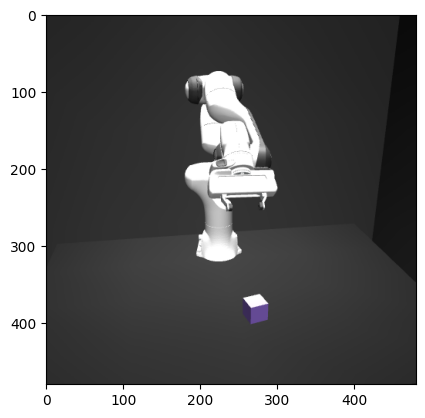

In [4]:
imgs = f["data"]["demo_0"]["observations"]["rgb"]
img = imgs[1]
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


In [7]:
# save using imageio
import imageio
import numpy as np
from PIL import Image

# Get all demos
demos = list(f["data"].keys())
n_demos = len(demos)

# Calculate grid dimensions - make it as square as possible
grid_size = int(np.ceil(np.sqrt(n_demos)))
rows = 4 # grid_size
cols = 7 # grid_size

# Get max sequence length
max_len = max(f["data"][dk]["obs"]["rgb"].shape[0] for dk in demos)

# Create padded grid of videos
grid_videos = []
for i in range(rows):
    row_videos = []
    for j in range(cols):
        idx = i * cols + j
        if idx < n_demos:
            # Get video and pad with last frame
            imgs = f["data"][demos[idx]]["obs"]["rgb"][:]
            pad_len = max_len - len(imgs)
            if pad_len > 0:
                pad_frames = np.repeat(imgs[-1:], pad_len, axis=0)
                imgs = np.concatenate([imgs, pad_frames])
            row_videos.append(imgs)
        else:
            # Pad empty grid spots with black frames
            row_videos.append(np.zeros((max_len, 480, 480, 3), dtype=np.uint8))
    grid_videos.append(row_videos)

# Combine into grid for each timestep
grid_frames = []
for t in range(max_len):
    rows_t = []
    for i in range(rows):
        row_t = np.concatenate([grid_videos[i][j][t] for j in range(cols)], axis=1)
        rows_t.append(row_t)
    grid_t = np.concatenate(rows_t, axis=0)
    # Resize frame to 960x960
    grid_t = Image.fromarray(grid_t).resize((grid_t.shape[1] // 4, grid_t.shape[0] // 4))
    grid_frames.append(np.array(grid_t))

# Save grid video
imageio.mimsave("grid_video.gif", grid_frames)